In [1]:
# import library
import numpy as np 
import pandas as pd 

In [2]:
# load data
hotel = pd.read_csv('hotel_bookings.csv')
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [3]:
hotel['country'].describe()

count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object

## Handling Missing Value

In [4]:
# See the missing Values for Children
hotel[hotel['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [5]:
# replcae the missing values of children with the median value
hotel['children'].fillna(hotel['children'].median(),inplace = True)

In [6]:
# convert the number of children to int
hotel['children'] = hotel['children'].astype(int)

In [7]:
# See the missing Values for country
hotel[hotel['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,...,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [8]:
# Groupby customer_type and find the most frequenct country for each customer_type
hotel.groupby('customer_type')['country'].agg(pd.Series.mode)

customer_type
Contract           PRT
Group              PRT
Transient          PRT
Transient-Party    PRT
Name: country, dtype: object

In [9]:
# Replace missing values in "country" with most frequent appeared value for country in each the customer_type 
hotel["country"] = hotel.groupby("customer_type")['country'].transform(lambda x: x.fillna(x.mode()[0]))

In [10]:
hotel.to_csv("new_hotel_bookings.csv")

## Data Visualization

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20,10))
sns.set(style='darkgrid')

<Figure size 1440x720 with 0 Axes>

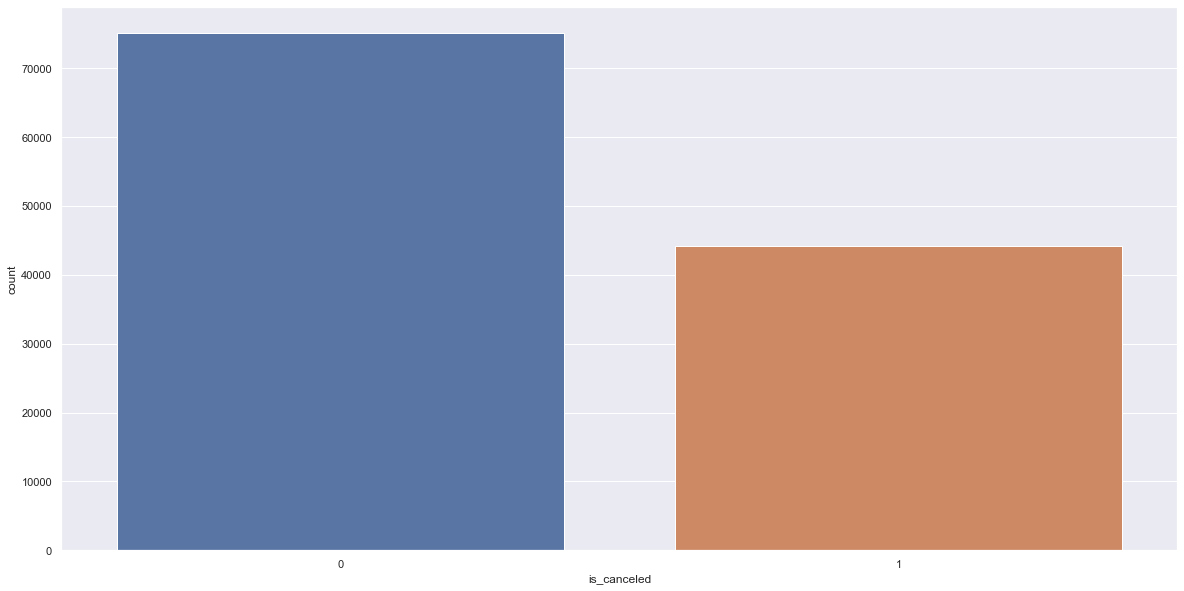

In [12]:
# The label - is_canceled
plt.figure(figsize = (20,10))
sns.countplot(hotel['is_canceled'])

- It seems that the majority of reservations were not canceled

<Figure size 1440x720 with 0 Axes>

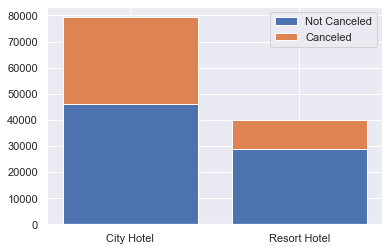

<Figure size 1440x720 with 0 Axes>

In [13]:
# Stacked Bar chart for hotel
plt.figure(figsize = (20,10))

canceled = hotel[hotel.is_canceled==1]['hotel'].value_counts()
not_canceled = hotel[hotel.is_canceled==0]['hotel'].value_counts()

labels = ['City Hotel', 'Resort Hotel']
fig, ax = plt.subplots()
plt.figure(figsize = (20,10))
ax.bar(labels, not_canceled, label='Not Canceled')
ax.bar(labels, canceled, bottom=not_canceled, label='Canceled')

ax.legend()
plt.show()

- City Hotel has more bookings (3/4 of bookings), any maybe that's why it has more cancellations.
- City Hotel has more bookings because it is more affordable
#### Resort Hotel is more appropriate for larger group of customers (family with childern)??  -- need to find out the relation.

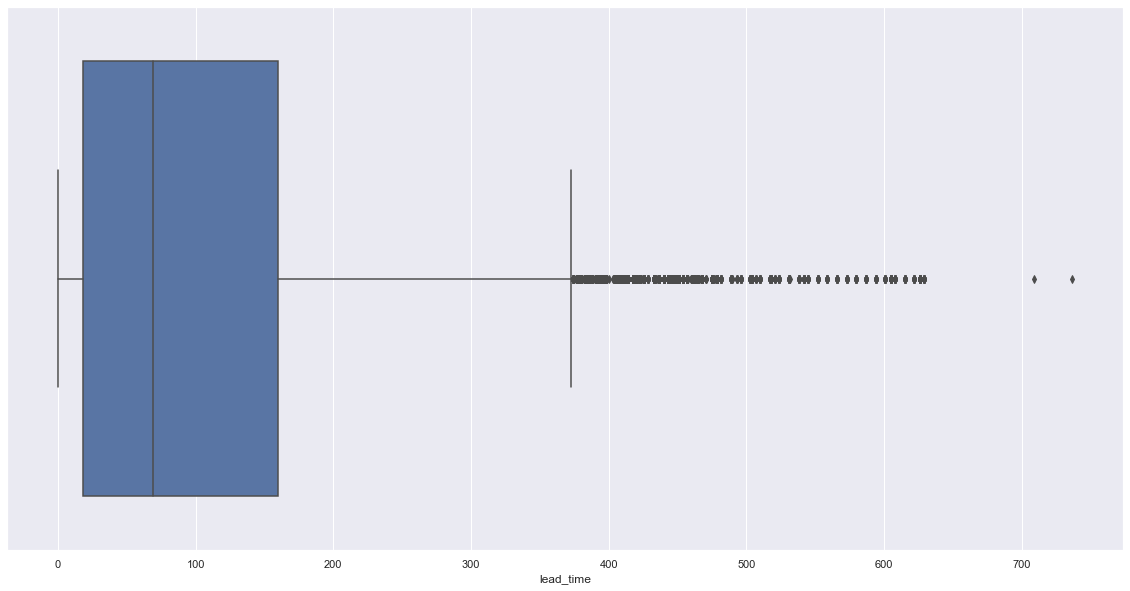

In [14]:
# boxplot for lead time and for lead time
plt.figure(figsize = (20,10))
sns.boxplot(hotel['lead_time'])

- The outliers are those larger than ~370
- The majority are smaller than 200

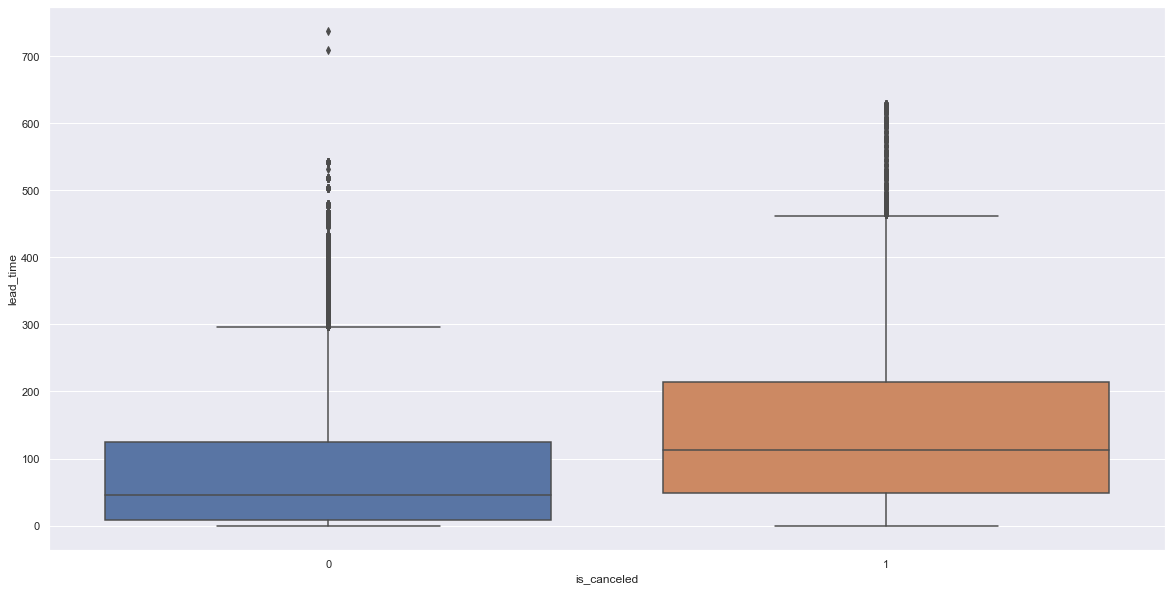

In [15]:
# boxplot for lead time and for lead time reagarding to is_canceled
plt.figure(figsize = (20,10))
sns.boxplot(x=hotel['is_canceled'],y=hotel['lead_time'])

- Bookings tend to be canceled when the lead time is longer

<Figure size 1440x720 with 0 Axes>

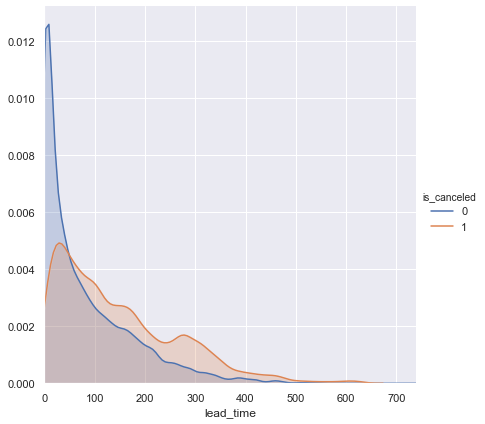

In [16]:
# Density Curve for lead time by cancellation
plt.figure(figsize = (20,10))
sns.FacetGrid(hotel,hue='is_canceled',height=6,xlim=[0,740]).map(sns.kdeplot,'lead_time',shade=True).add_legend()

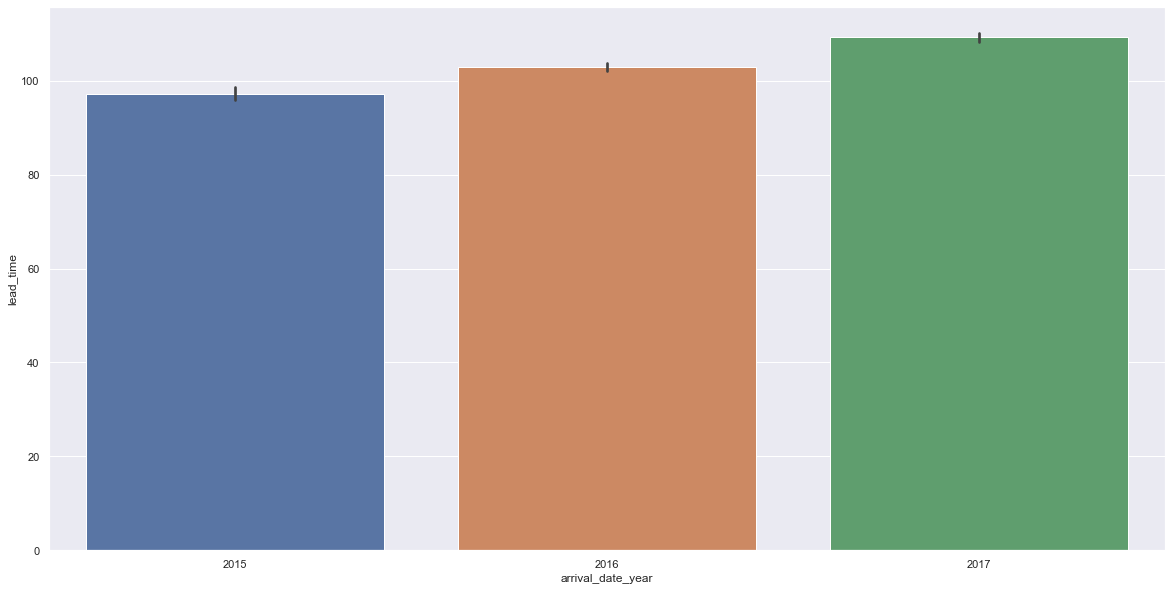

In [17]:
# bar chart for lead time with regard to arrival year
plt.figure(figsize = (20,10))
sns.barplot(x ='arrival_date_year', y = 'lead_time', data = hotel)

- When the lead time is larger than 60, people tend to cancel their bookings

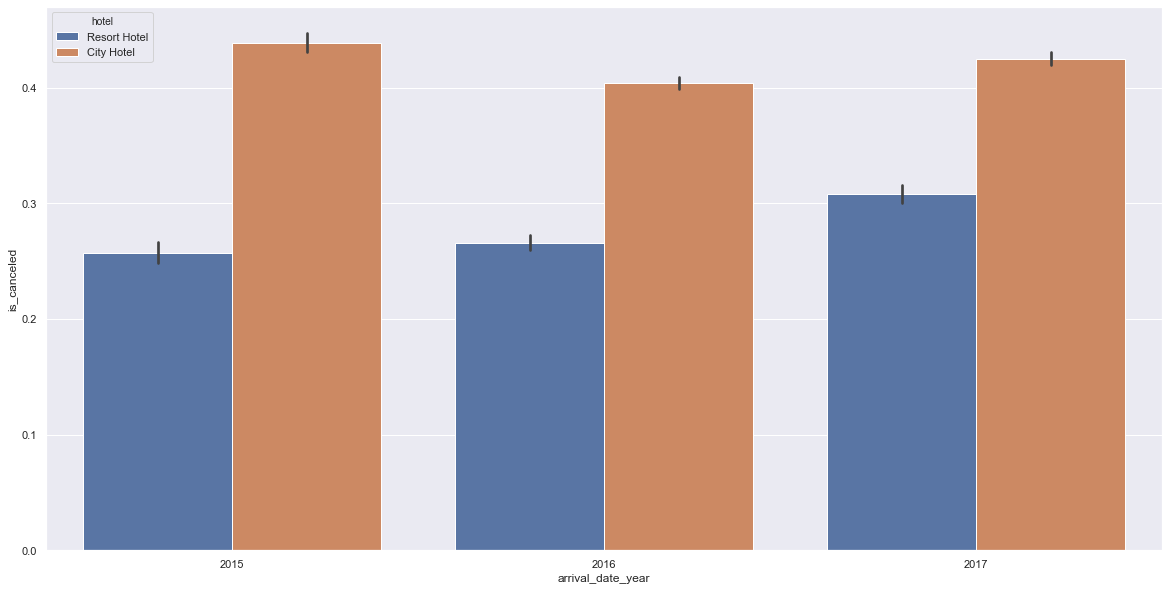

In [18]:
# Stacked Bar chart for arrival year
plt.figure(figsize = (20,10))
sns.barplot(x='arrival_date_year', y='is_canceled', hue='hotel',data=hotel)

- 2016 has more reservations, but the overall cancellation rates among three years are approximately the same

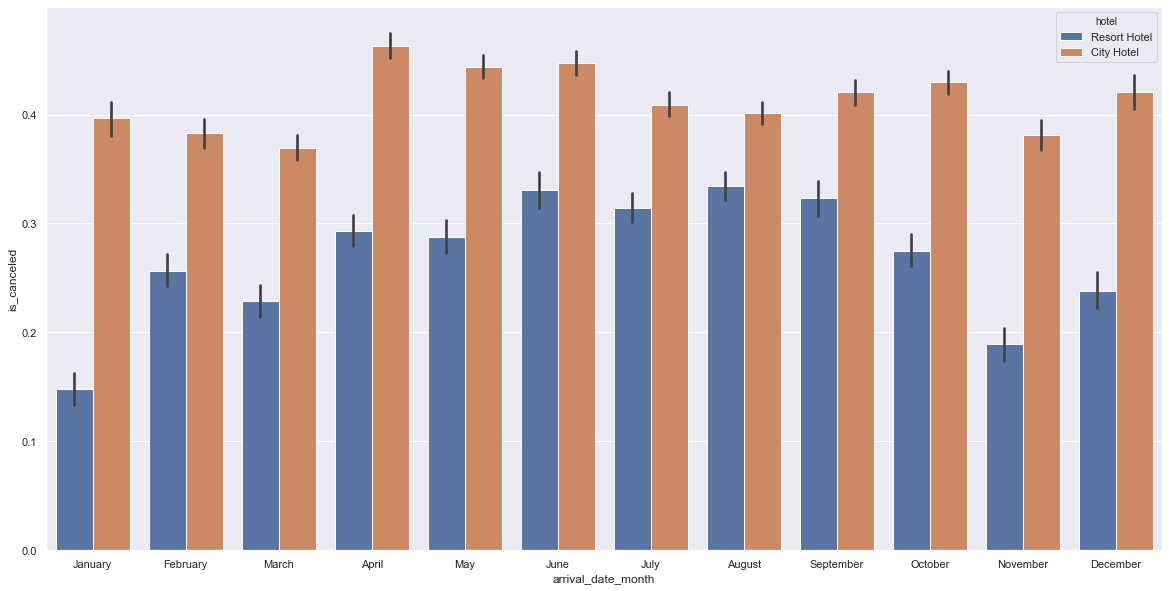

In [19]:
# Bar chart for arrival month
plt.figure(figsize = (20,10))
month=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
       'August', 'September', 'October', 'November', 'December']
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data=hotel, order=month)

- Increasing more bookings arond the middle of the year (summer period is the peak)

<Figure size 1440x720 with 0 Axes>

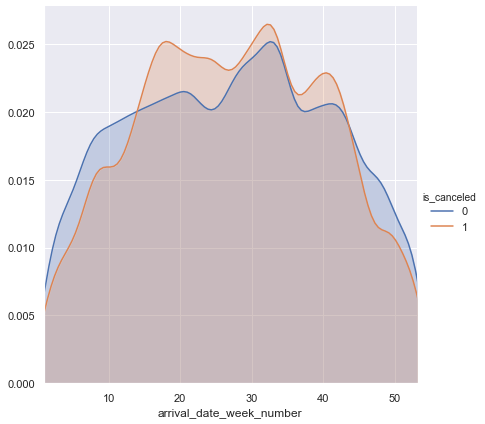

In [20]:
# Density Curve for arrival week number by cancellation
plt.figure(figsize = (20,10))
sns.FacetGrid(hotel, hue = 'is_canceled',height = 6, xlim=[1,53]).map(sns.kdeplot, 'arrival_date_week_number',shade=True).add_legend()

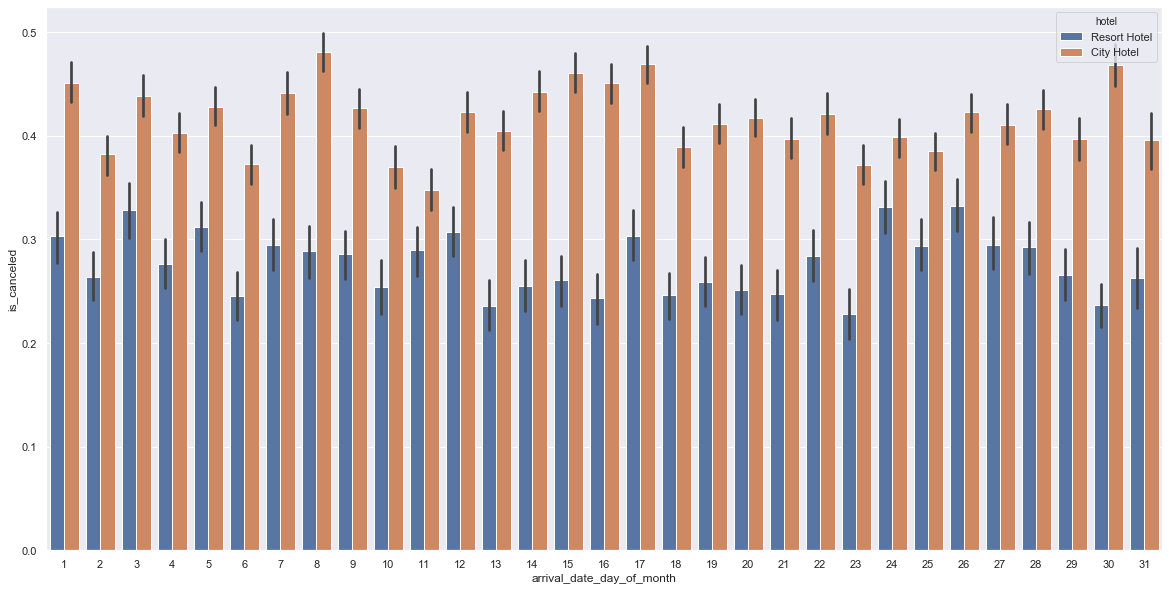

In [21]:
# bar chart for arrival date of month
plt.figure(figsize=(20,10))
sns.barplot(x='arrival_date_day_of_month', y='is_canceled', hue='hotel',data=hotel)

- flucutations for the arrival day of month.

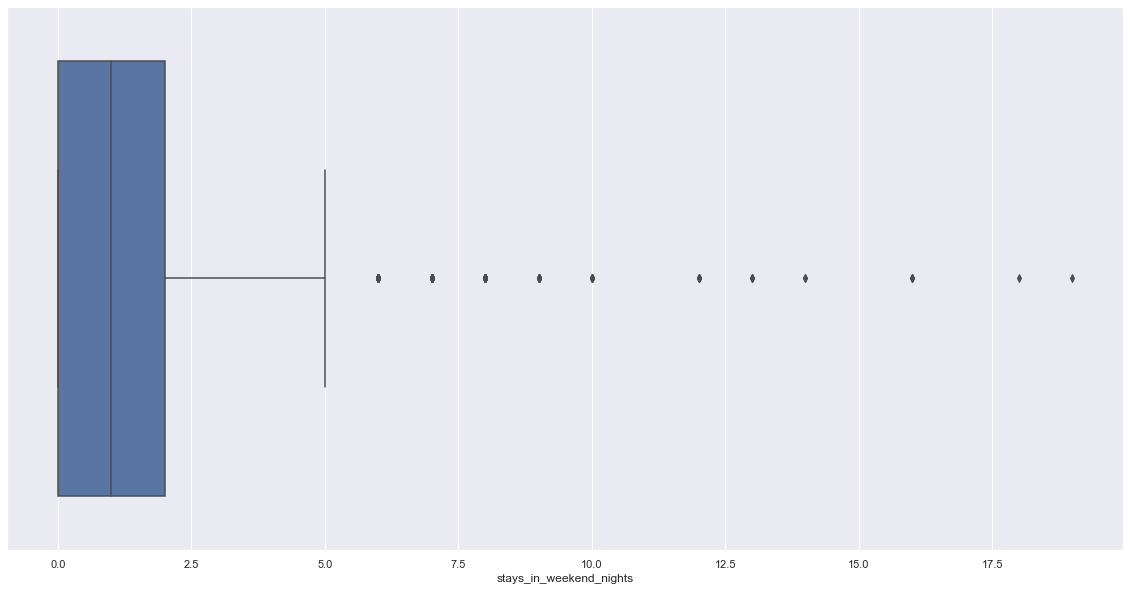

In [22]:
# box plot of stays on weekend nights
plt.figure(figsize = (20,10))
sns.boxplot(x=hotel['stays_in_weekend_nights'])

- outlikers are larger than 5
- majority is smaller than 2.5 days (i.e. around one weekend)

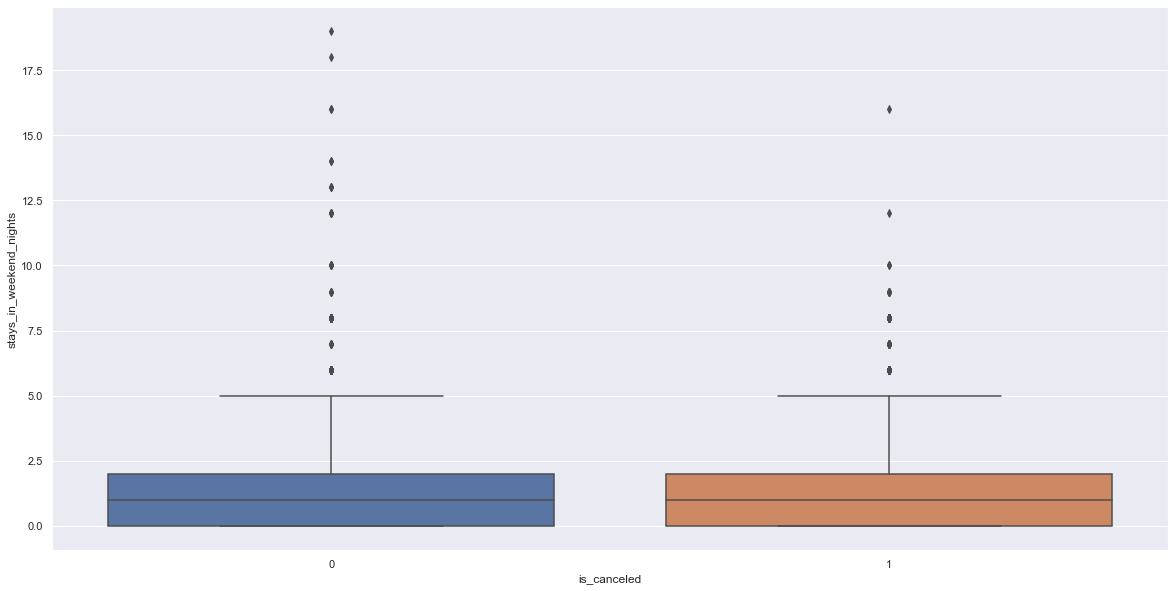

In [23]:
# box plot of stays on weekend nights by is_canceled
plt.figure(figsize = (20,10))
sns.boxplot(x=hotel['is_canceled'],y=hotel['stays_in_weekend_nights'])

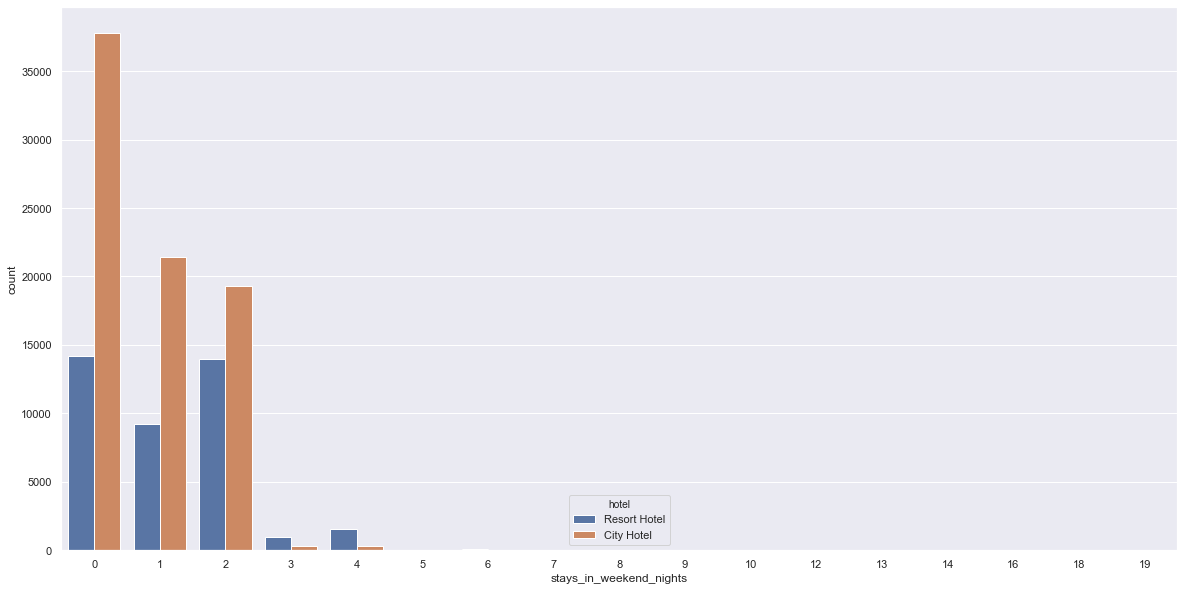

In [24]:
plt.figure(figsize = (20,10))
sns.countplot(x='stays_in_weekend_nights', hue='hotel', data=hotel)

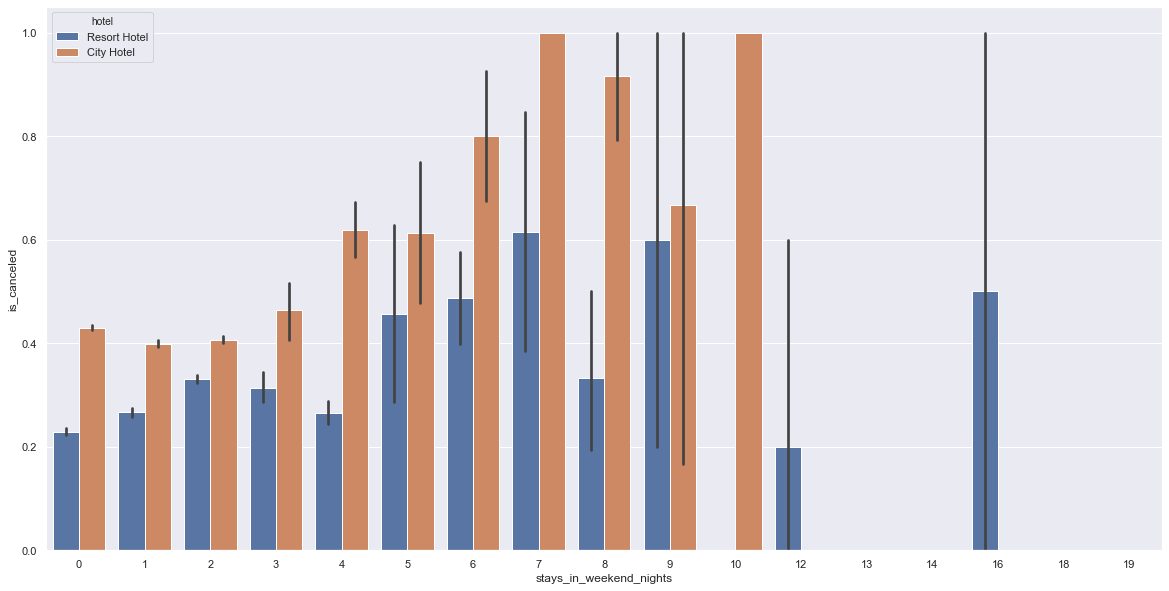

In [25]:
# bar chart for stays on weekend nights
plt.figure(figsize=(20,10))
sns.barplot(x='stays_in_weekend_nights', y='is_canceled', hue='hotel', data=hotel)

- The cancellation rates tend to increase as the increase in weekend nights

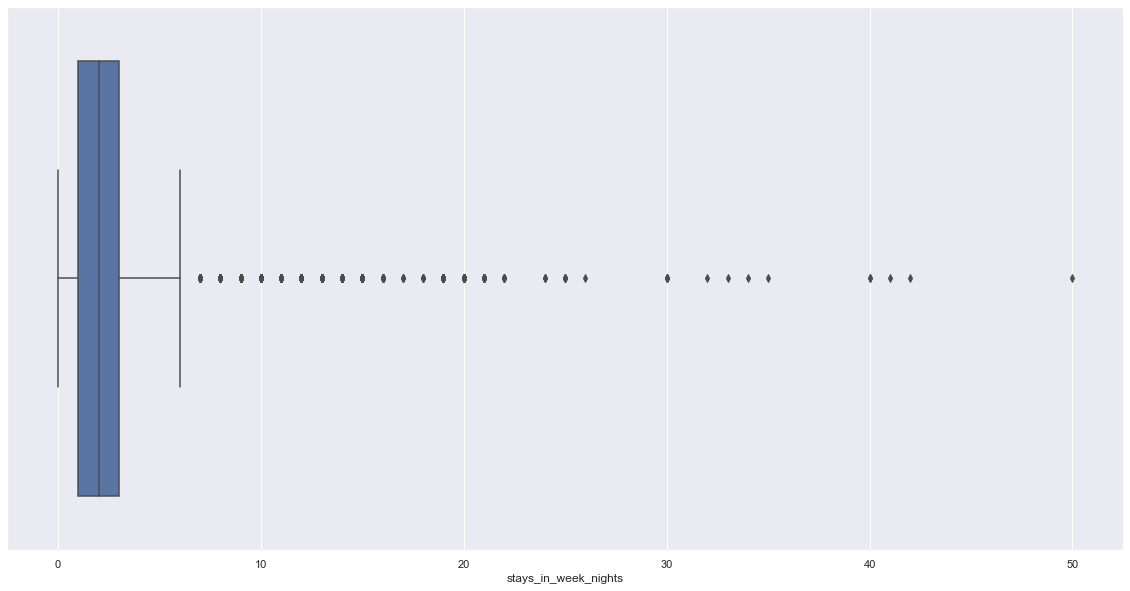

In [26]:
# box plot of stays on week nights
plt.figure(figsize = (20,10))
sns.boxplot(x=hotel['stays_in_week_nights'])

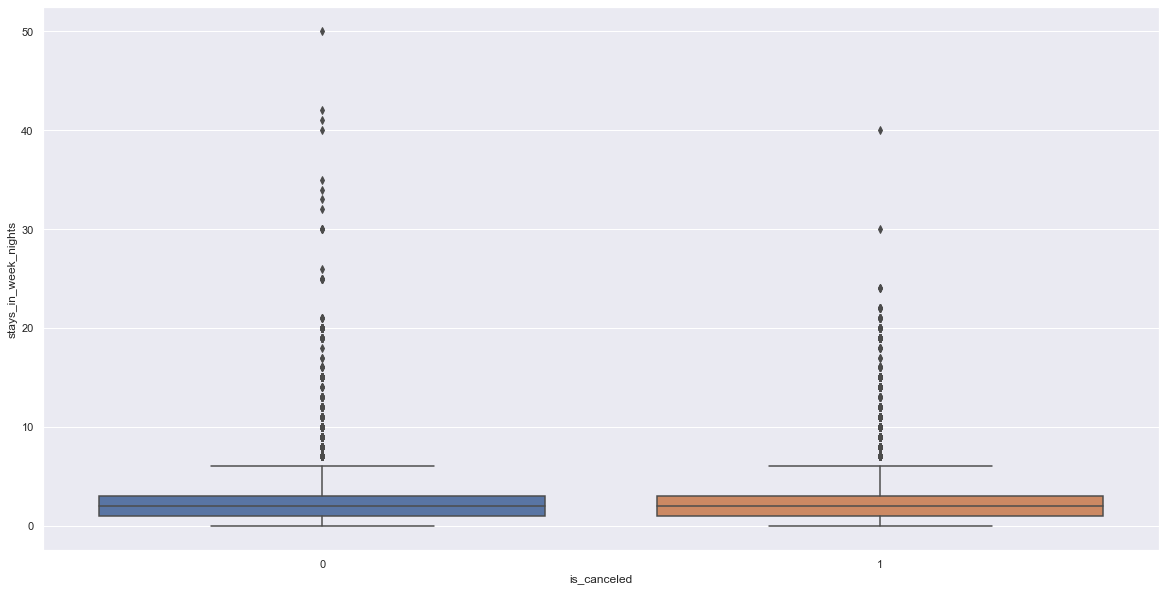

In [27]:
# box plot of stays on weekend nights by is_canceled
plt.figure(figsize = (20,10))
sns.boxplot(x=hotel['is_canceled'],y=hotel['stays_in_week_nights'])

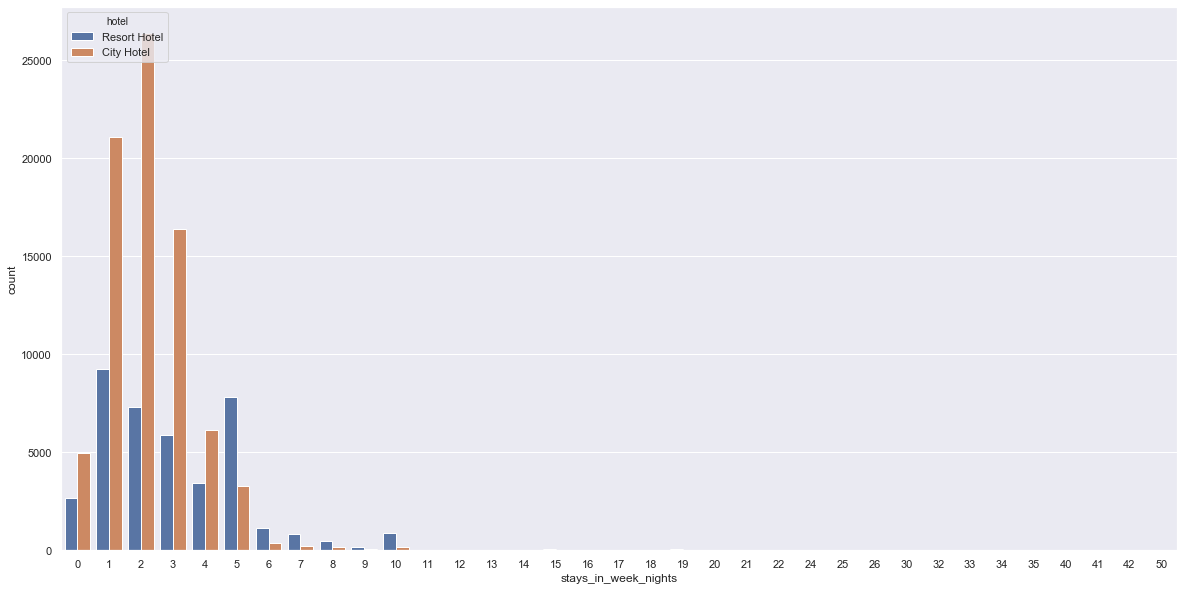

In [29]:
plt.figure(figsize = (20,10))
sns.countplot(x='stays_in_week_nights', hue='hotel', data=hotel)

- from the above 3 graphs we can see the majority of people are staying for around 0~5 week nights.

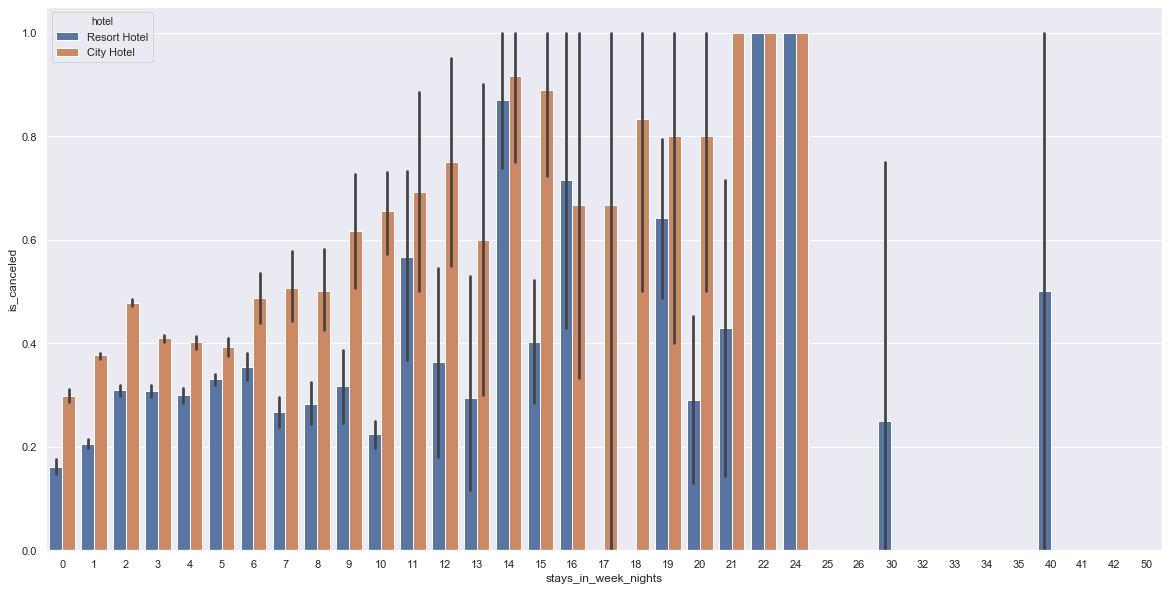

In [30]:
# bar chart for stays on week nights
plt.figure(figsize=(20,10))
sns.barplot(x='stays_in_week_nights', y='is_canceled', hue='hotel', data=hotel)

- same as the weekend nights, the longer the weekday nights, the higher chance the reservation will be cancelled

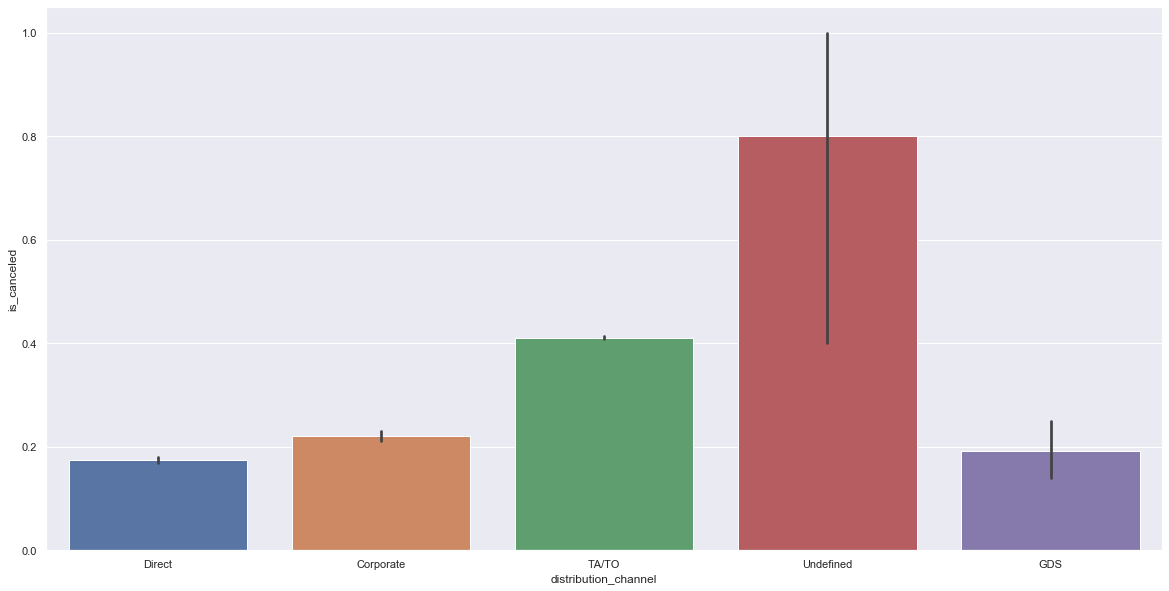

In [31]:
plt.figure(figsize = (20,10))
sns.barplot(x='distribution_channel', y='is_canceled',data=hotel)

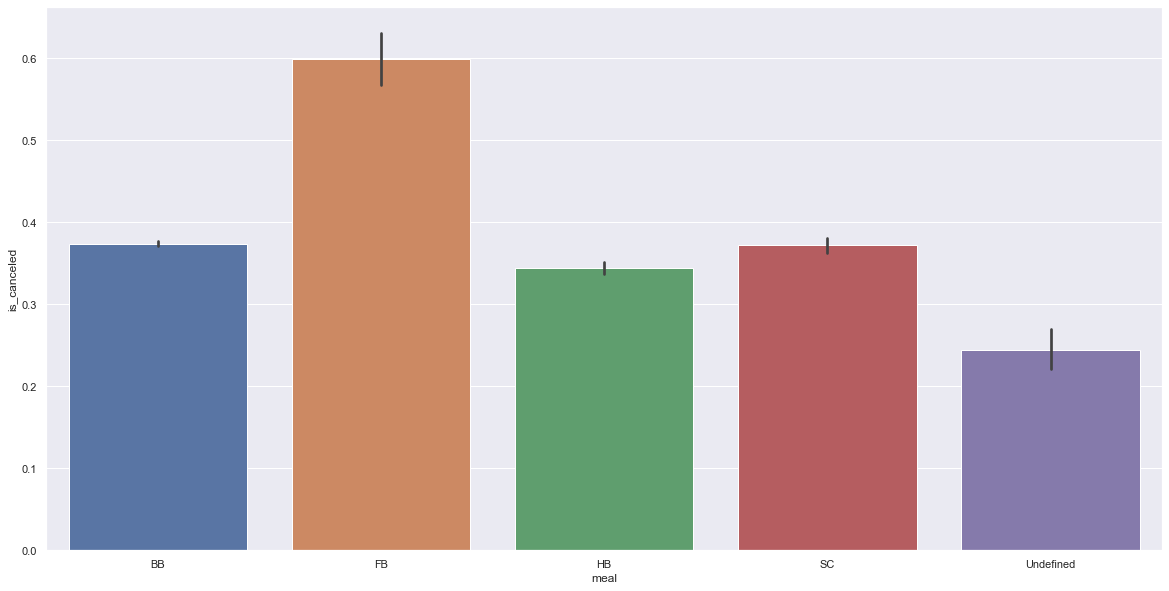

In [32]:
# Stacked Bar chart for arrival year
plt.figure(figsize = (20,10))
sns.barplot(x='meal', y='is_canceled',data=hotel)

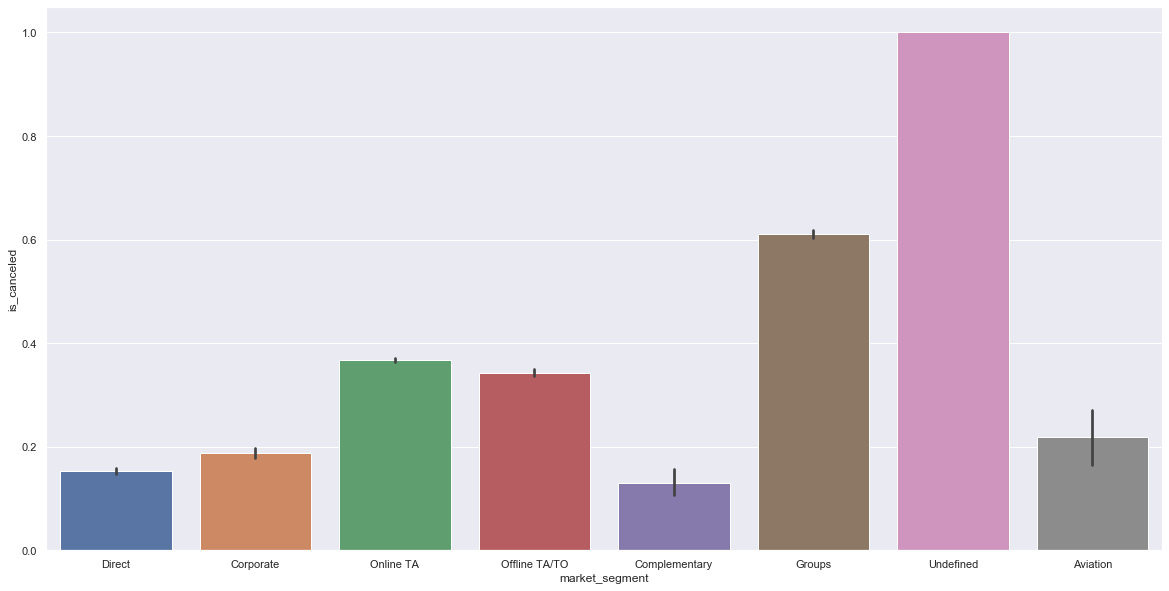

In [33]:
# Stacked Bar chart for arrival year
plt.figure(figsize = (20,10))
sns.barplot(x='market_segment', y='is_canceled',data=hotel)

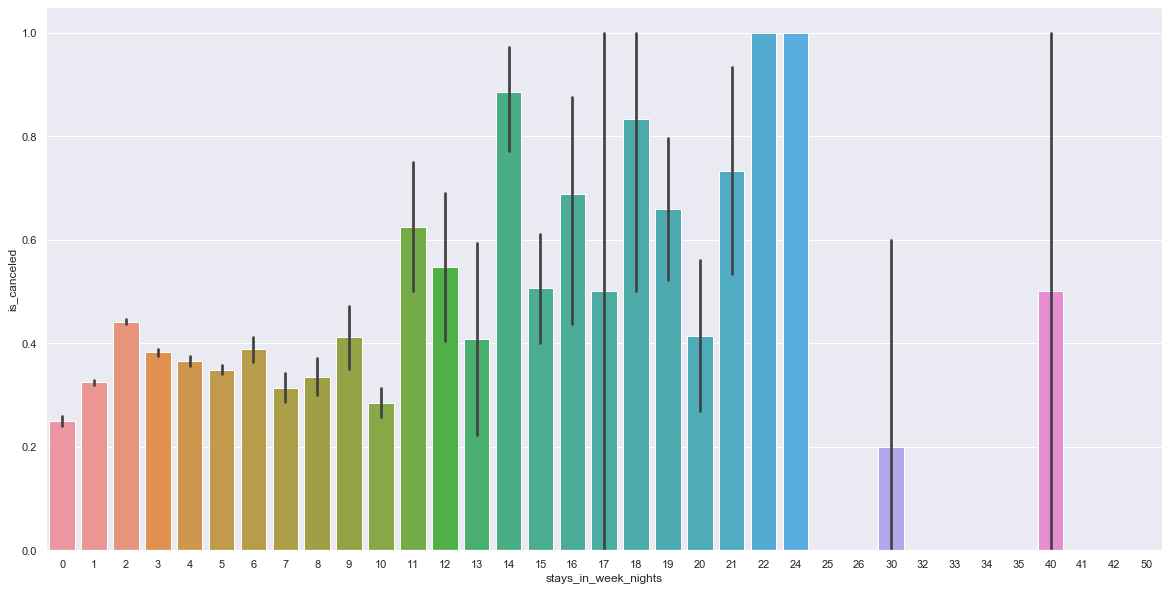

In [34]:
# Stacked Bar chart for arrival year
plt.figure(figsize = (20,10))
sns.barplot(x='stays_in_week_nights', y='is_canceled',data=hotel)

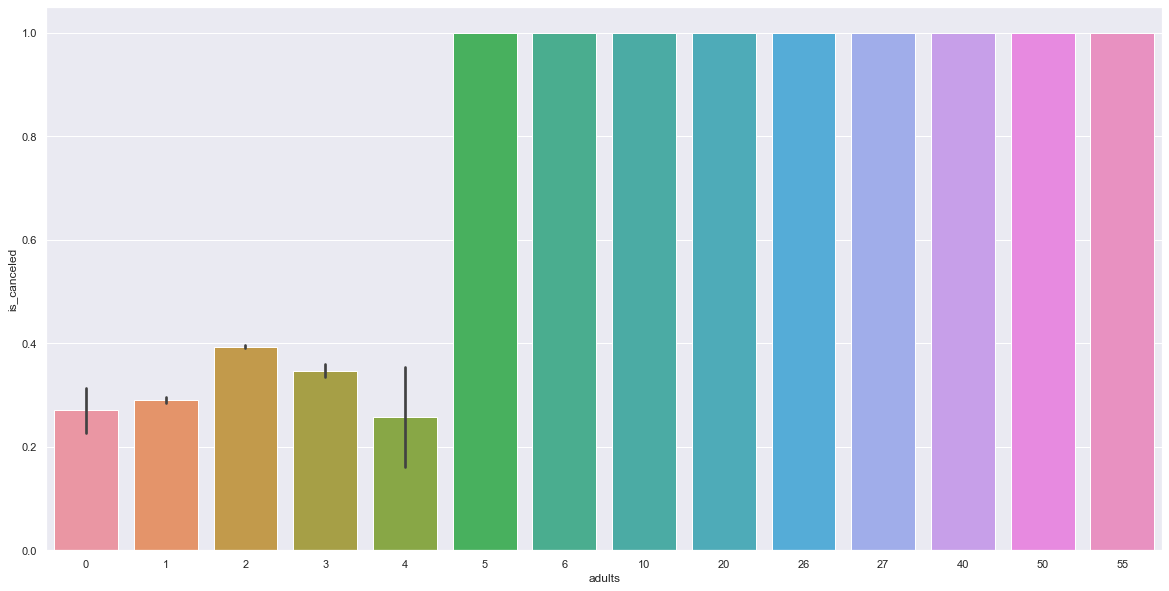

In [35]:
plt.figure(figsize = (20,10))
sns.barplot(x='adults', y='is_canceled',data=hotel)

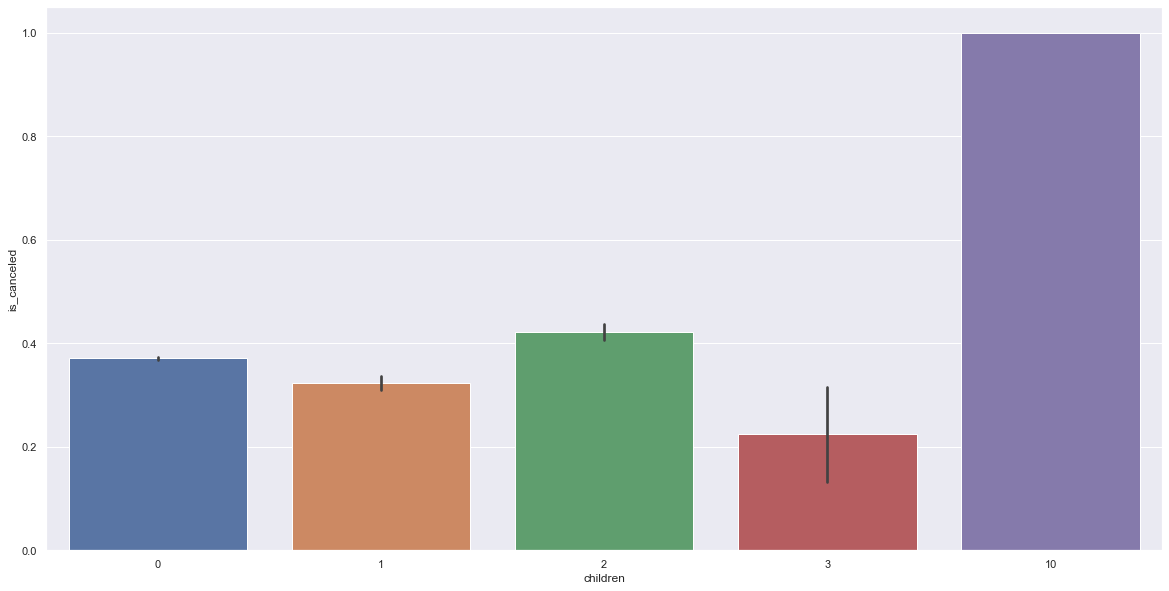

In [36]:
plt.figure(figsize = (20,10))
sns.barplot(x='children', y='is_canceled',data=hotel)

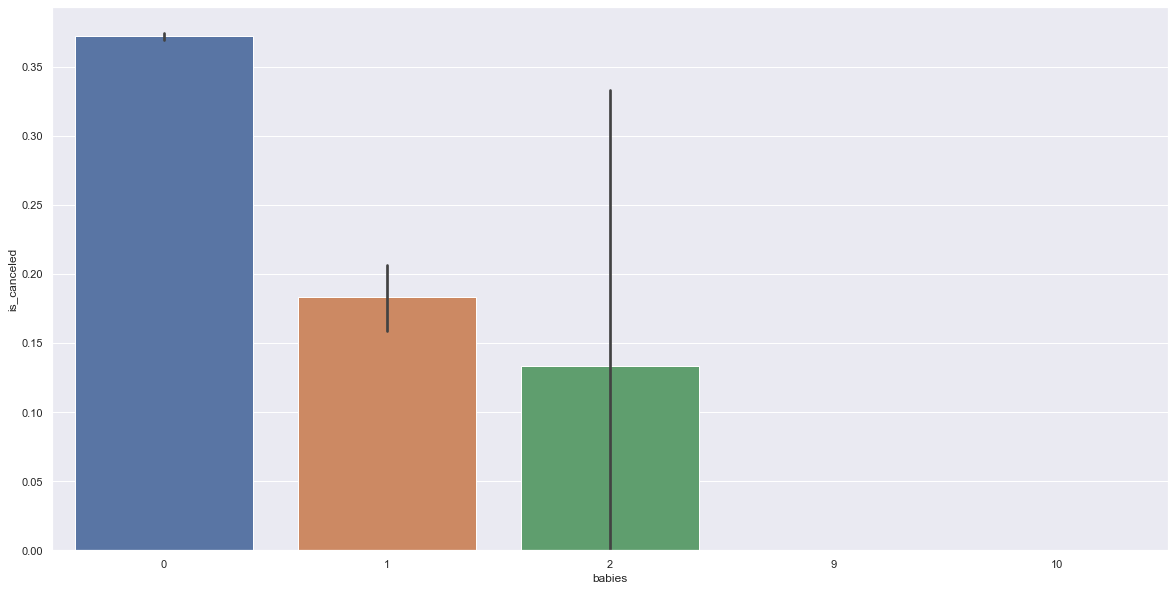

In [37]:
plt.figure(figsize = (20,10))
sns.barplot(x='babies', y='is_canceled',data=hotel)

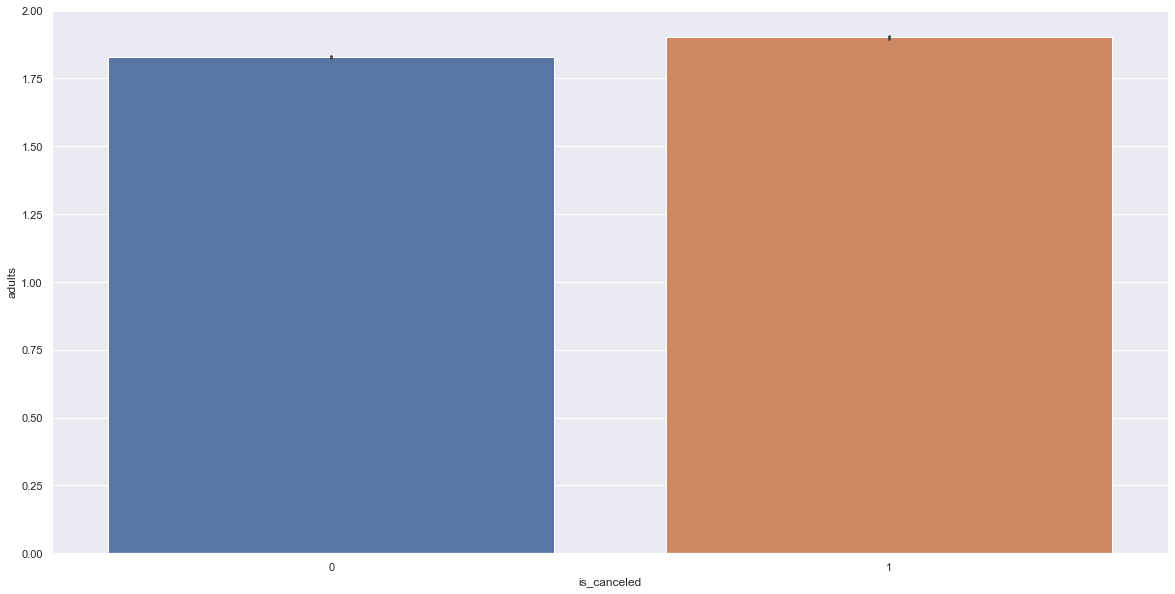

In [38]:
plt.figure(figsize = (20,10))
sns.barplot(x ='is_canceled', y = 'adults', data = hotel)

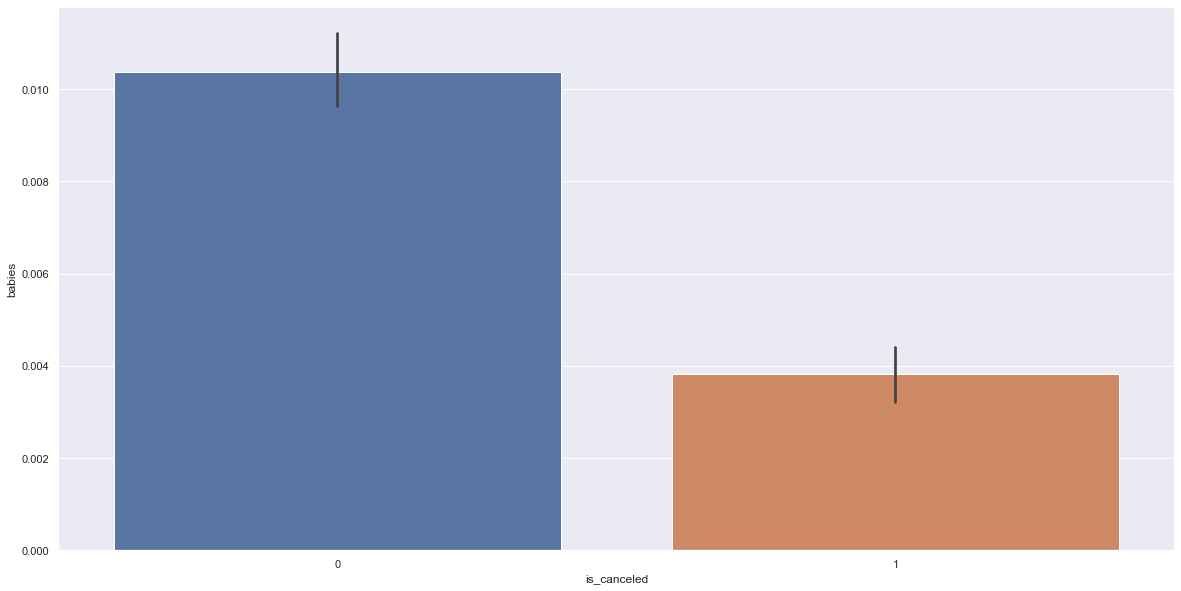

In [39]:
plt.figure(figsize = (20,10))
sns.barplot(x ='is_canceled', y = 'babies', data = hotel)

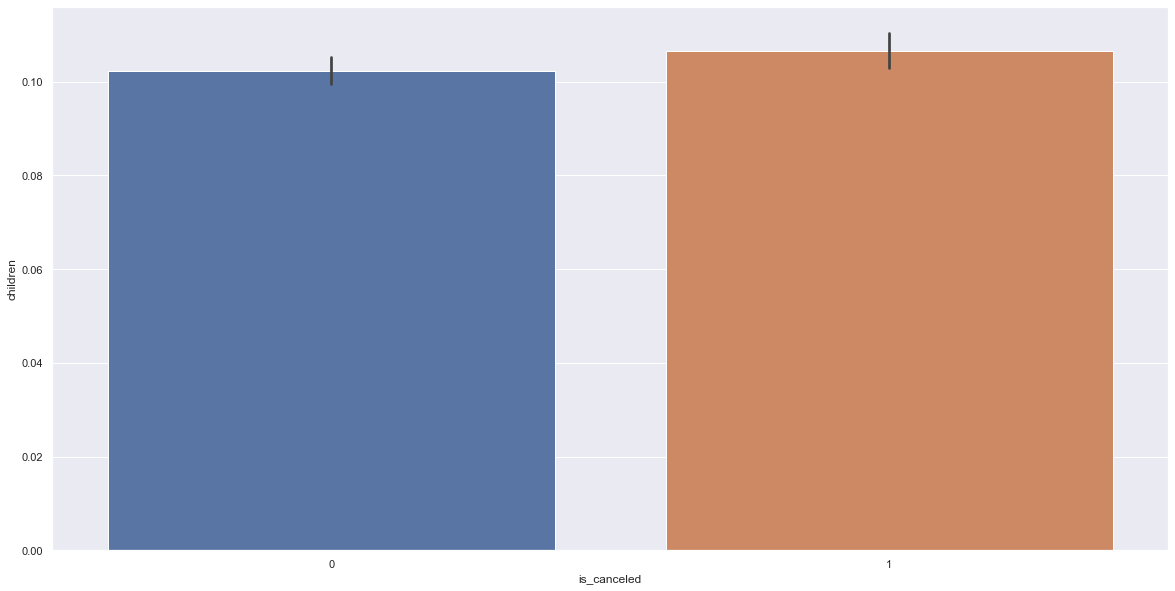

In [40]:
plt.figure(figsize = (20,10))
sns.barplot(x ='is_canceled', y = 'children', data = hotel)

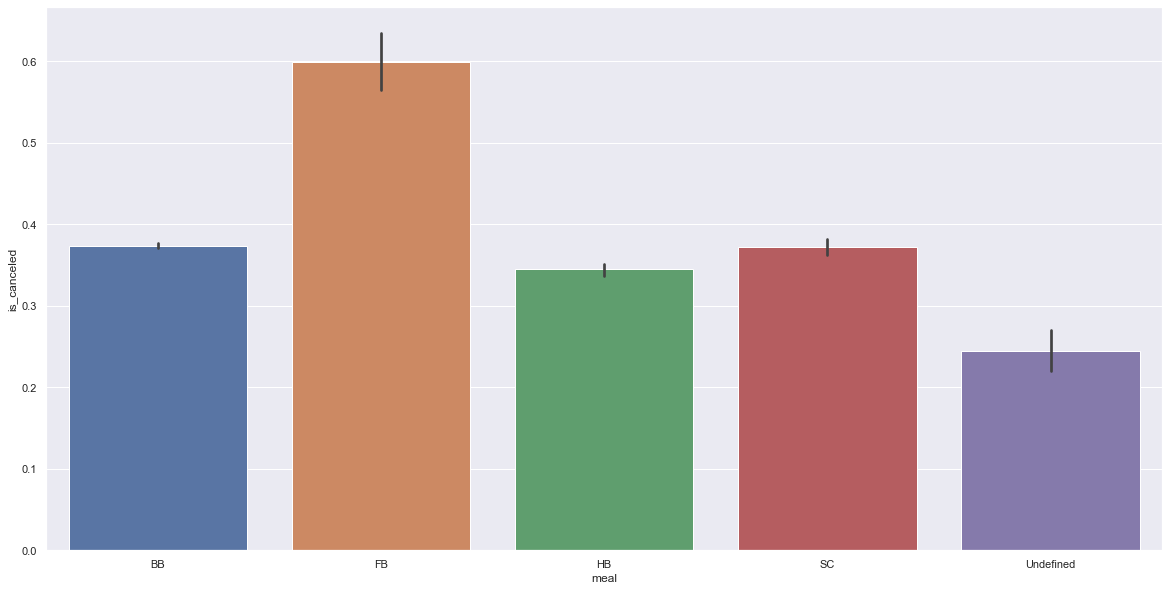

In [41]:
# Stacked Bar chart for arrival year
plt.figure(figsize = (20,10))
sns.barplot(x='meal', y='is_canceled',data=hotel)

## Feature Engineering

In [43]:
# to check the feature types
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### Handling categorical features

In [44]:
# change hotels to 0 and 1 (City Hotel: 1, Resort Hotel: 0)
hotel['hotel'] = hotel.hotel.replace(['Resort Hotel','City Hotel'],[0,1])

In [45]:
# change arrival date month to 1 to 12
hotel['arrival_date_month'] = hotel.arrival_date_month.replace(month,np.arange(1,13))

In [46]:
# group months into seasons
spring = [3,4,5]
summer = [6,7,8]
fall = [9,10,11]
winter = [1,2,12]
hotel['seasons'] = hotel['arrival_date_month'].map(lambda i: "spring" if i in spring else "summer" if i in summer else "fall" if i in fall else "winter")

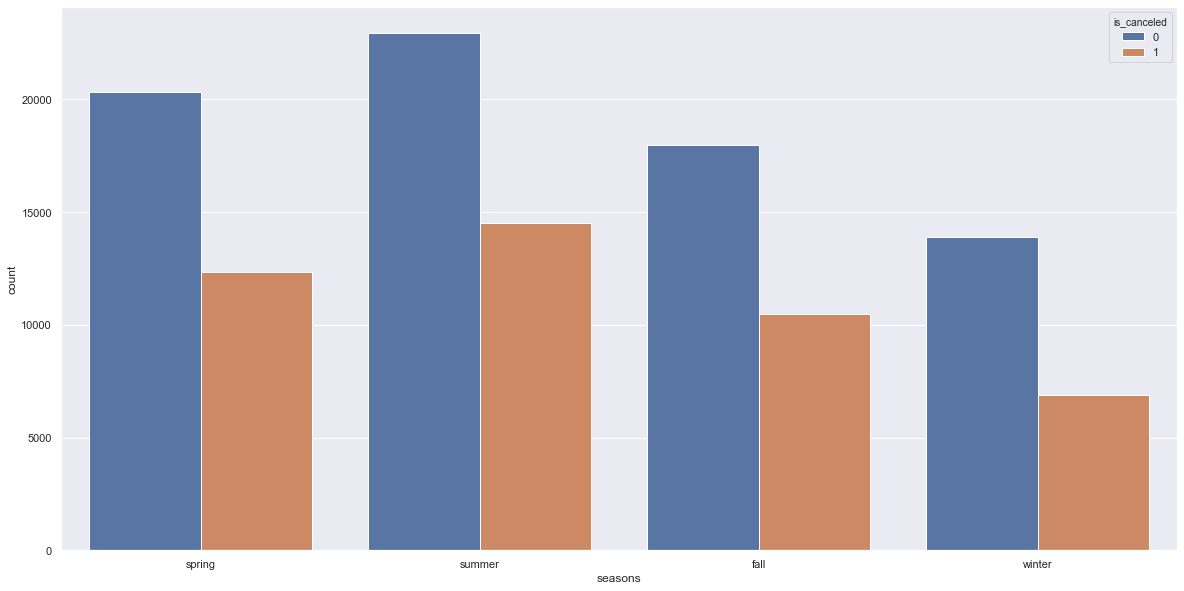

In [47]:
# bar chart for seasons
plt.figure(figsize=(20,10))
seasons = ['spring','summer','fall','winter']
sns.countplot(x = 'seasons', hue = 'is_canceled', data=hotel, order=seasons)

In [48]:
# create one-hot variavles for seasons
season_dummies = pd.get_dummies(hotel['seasons'])

# adding dummy variables into the dataset
hotel = pd.concat([hotel, season_dummies],axis=1,sort=True)

# drop the season column after adding the dummies
hotel = hotel.drop(columns=['seasons'])

In [49]:
mealdummy = pd.get_dummies(hotel['meal'],prefix ='meal')

In [50]:
# Finding the most predictive country with >80% majority label and more than 5000 entries

# Groupby country and find how many cancelled and not cancelled each country has
hotelcountrycount = hotel.groupby(['country','is_canceled'])['is_canceled'].size().reset_index(name='count_cancelled')
# hotelcountrysum= hotel.groupby('country')['is_canceled'].agg(pd.Series.sum).reset_index(name='sum') 
hotelcountrysum = hotel.groupby('country')['is_canceled'].count().reset_index(name='sum')
# left join the sum and count
countryjoined= hotelcountrycount.merge(hotelcountrysum, on='country', how='left')
# finding the percentage of each label in a country
countryjoined['percentage'] = countryjoined.apply(lambda x: x['count_cancelled']/x['sum'], axis=1)
# remove all countires whose majority label is less than 80%
countryjoined = countryjoined[countryjoined['percentage'] > 0.8]
# remove all countries whose sum is less than 5000
countryjoined= countryjoined[countryjoined['sum'] > 5000]

In [51]:
# most predictive countries. With >80% majority label and more than 5000 entries
countryjoined

,country,is_canceled,count_cancelled,sum,percentage
69,DEU,0,6069,7287,0.832853
92,FRA,0,8481,10415,0.814306


In [52]:
# FRA and DEU are the most predictive countries so they would be the dummy variables

hotel['country_is_FRA'] = hotel['country'].apply(lambda x: 1 if x == 'FRA' else 0)
hotel['country_is_DEU'] = hotel['country'].apply(lambda x: 1 if x == 'DEU' else 0)
hotel['country_is_other'] = hotel['country'].apply(lambda x: 1 if (x != 'DEU' and x!='FRA') else 0)

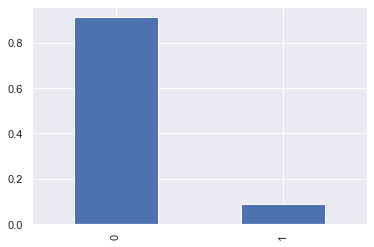

In [53]:
hotel['country_is_FRA'].value_counts(normalize=True).plot(kind='bar')

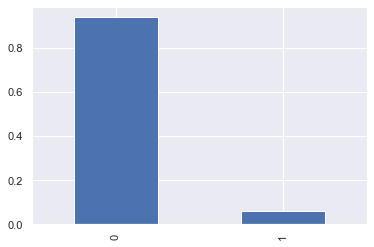

In [54]:
hotel['country_is_DEU'].value_counts(normalize=True).plot(kind='bar')

In [55]:
market_segment_dummy = pd.get_dummies(hotel['market_segment'],prefix ='market_segment')

In [56]:
distribution_channel_dummy = pd.get_dummies(hotel['distribution_channel'],prefix ='distribution_channel')

In [57]:
hotel = pd.concat([hotel,distribution_channel_dummy,market_segment_dummy,mealdummy],axis=1,sort=True)

### Handle numerical features

In [58]:
from sklearn import preprocessing

In [59]:
# lead time
hotel['lead_time'].skew()

1.3465498727254268

Perform `log( )` function on each lead time to scale the data.
#### After outliers handling

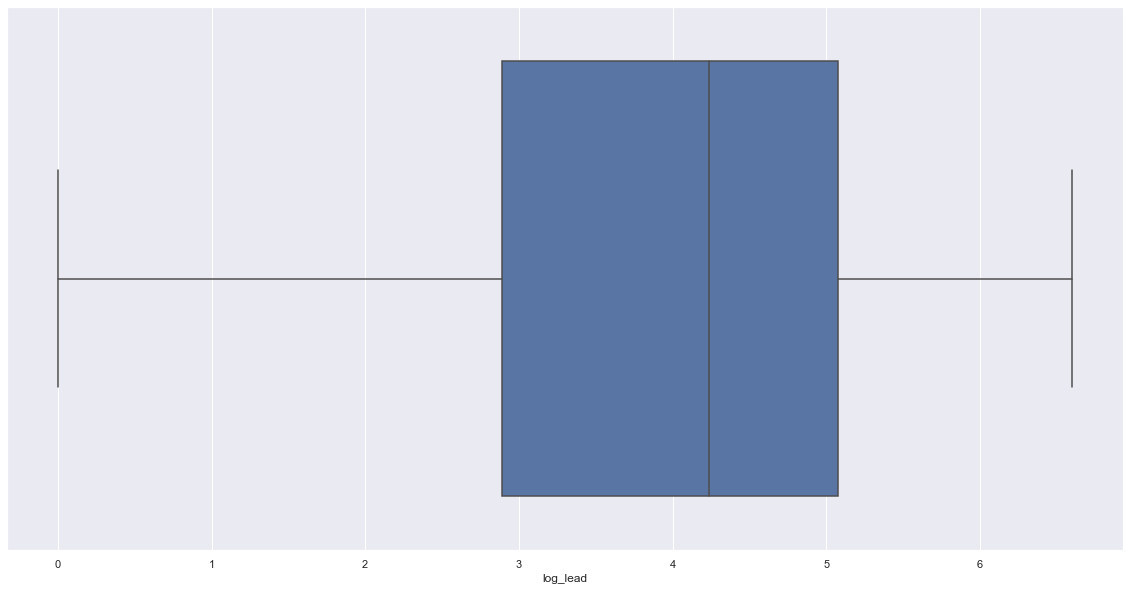

In [61]:
plt.figure(figsize = (20,10))
sns.boxplot(hotel['log_lead'])

In [62]:
# stays_in_weekend_nights
hotel['stays_in_weekend_nights'] = np.where(hotel['stays_in_weekend_nights'] > 5, 5, hotel['stays_in_weekend_nights'])

Data clipping: for each `stays_in_weekend_nights`, if it is larger than 5, change it to 5.
#### After outliers handling:

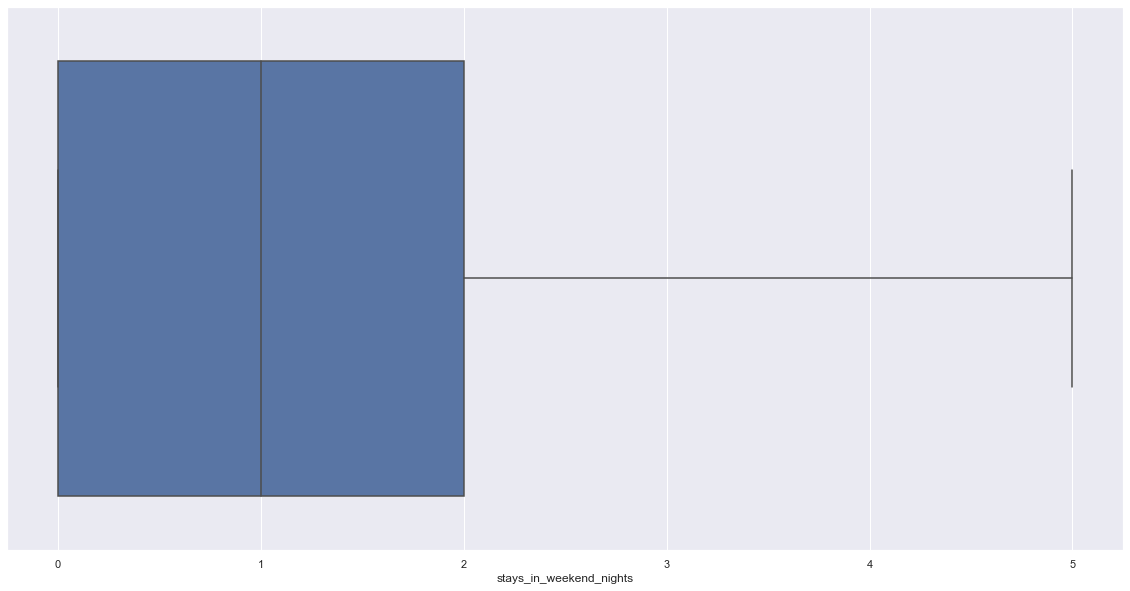

In [63]:
plt.figure(figsize = (20,10))
sns.boxplot(hotel['stays_in_weekend_nights'])

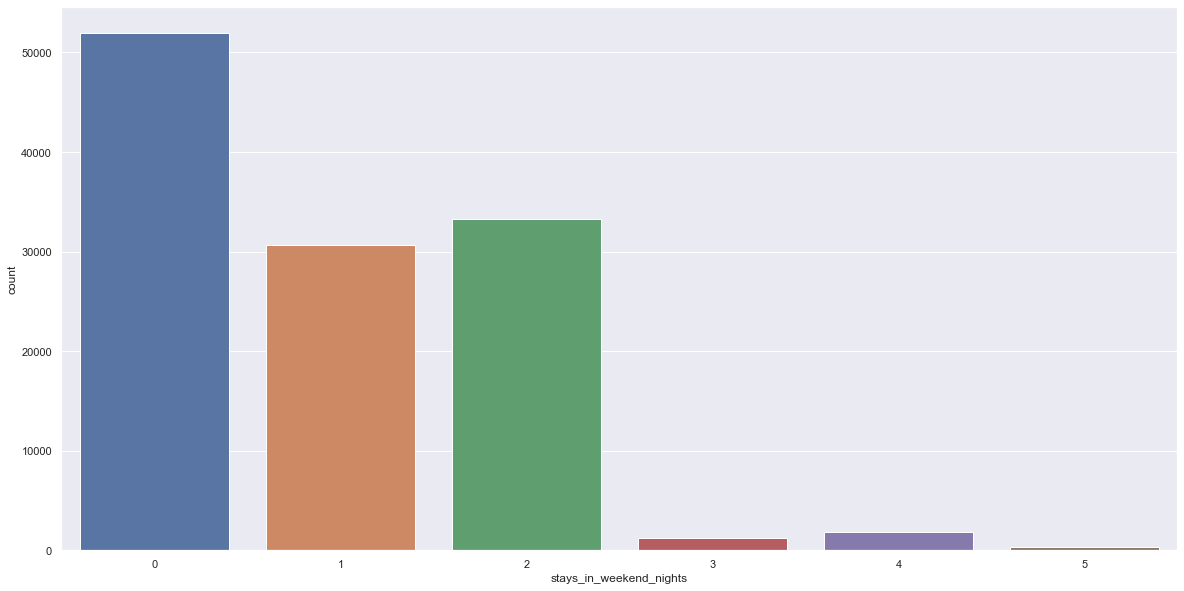

In [64]:
plt.figure(figsize = (20,10))
sns.countplot(hotel['stays_in_weekend_nights'])

In [65]:
# stays_in_week_nights
hotel['stays_in_week_nights'] = np.where(hotel['stays_in_week_nights'] > 10, 10, hotel['stays_in_week_nights'])

Data clipping: for each `stays_in_weekend_nights`, if it is larger than 5, change it to 5.
#### After outliers handling:

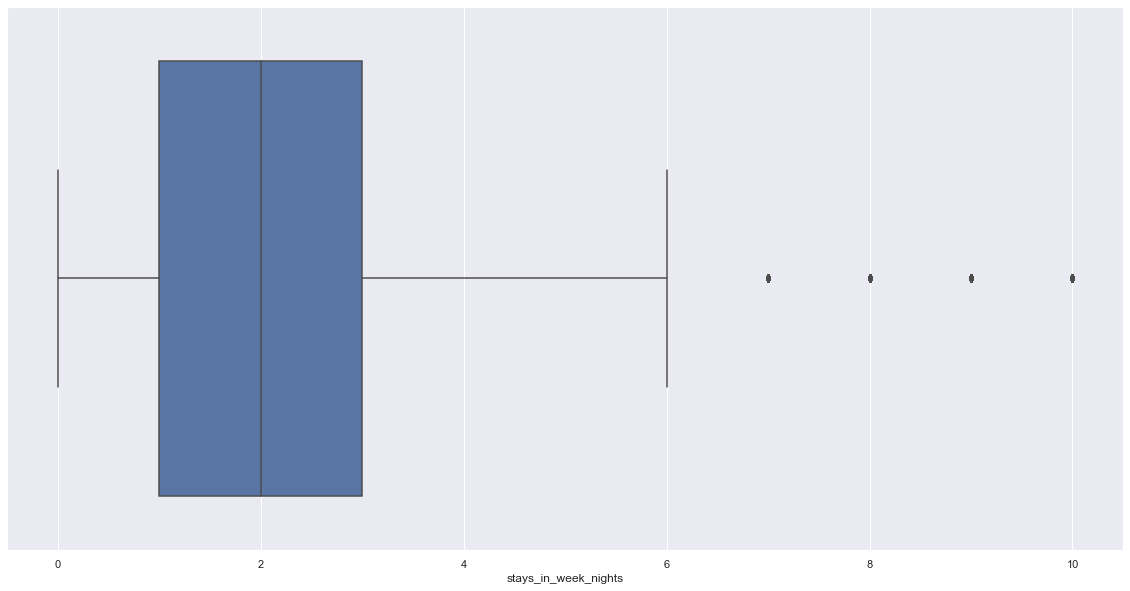

In [66]:
plt.figure(figsize = (20,10))
sns.boxplot(hotel['stays_in_week_nights'])

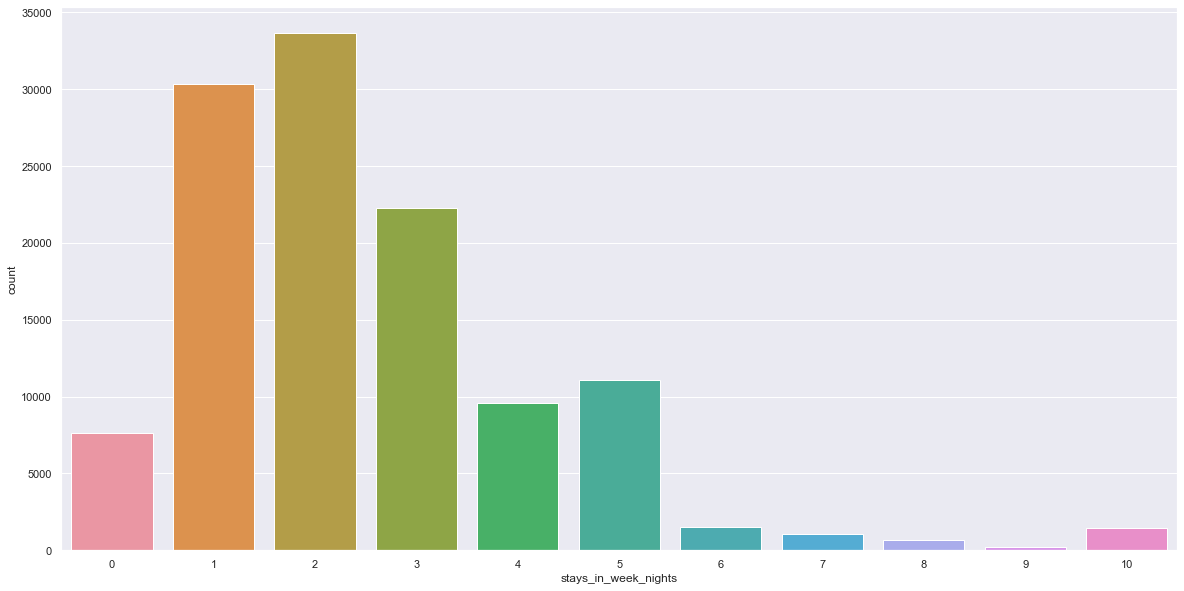

In [67]:
plt.figure(figsize = (20,10))
sns.countplot(hotel['stays_in_week_nights'])

In [68]:
# create a column indicates the total nights each customers stay
hotel['stays_in_total_nights'] = hotel['stays_in_weekend_nights'] + hotel['stays_in_week_nights']

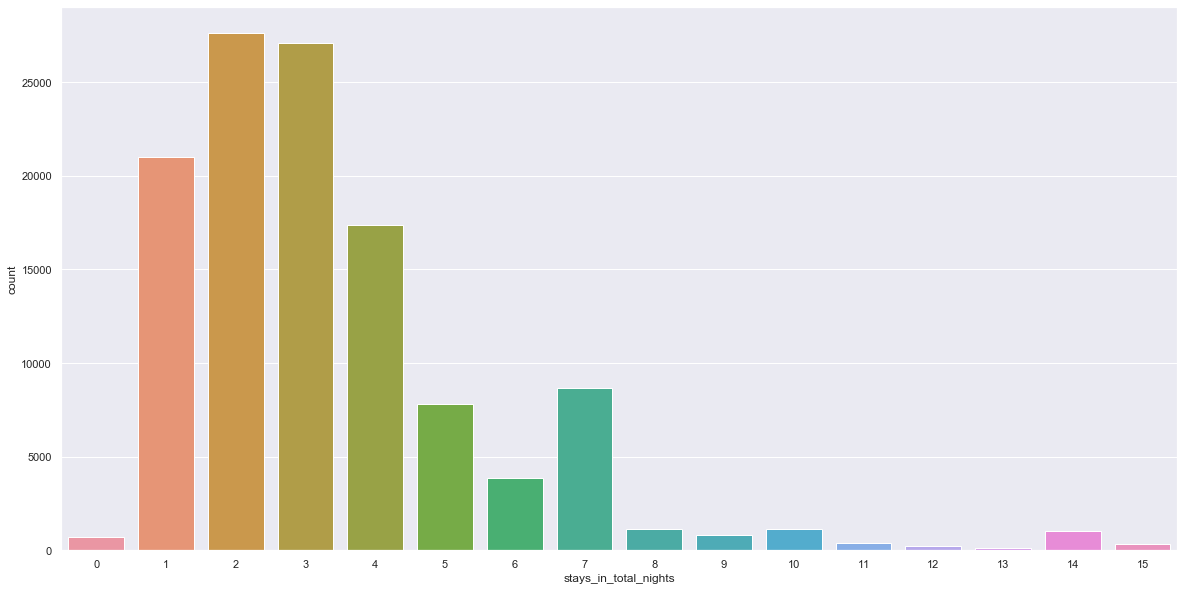

In [69]:
plt.figure(figsize = (20,10))
sns.countplot(hotel['stays_in_total_nights'])

#### Normalization

In [60]:
hotel['log_lead'] = hotel['lead_time'].map(lambda i: np.log(i) if i > 0 else 0)
hotel['log_lead'].skew()

-0.903993835862541

In [70]:
minmax_scaler = preprocessing.MinMaxScaler().fit(hotel[['lead_time']])
hotel['lead_time_minmax']=minmax_scaler.transform(hotel[['lead_time']])
hotel['lead_time_minmax']

0         0.464043
1         1.000000
2         0.009498
3         0.017639
4         0.018996
            ...   
119385    0.031208
119386    0.138399
119387    0.046133
119388    0.147897
119389    0.278155
Name: lead_time_minmax, Length: 119390, dtype: float64

In [71]:
minmax_scaler = preprocessing.MinMaxScaler().fit(hotel[['stays_in_weekend_nights']])
hotel['stays_in_weekend_nights_minmax']=minmax_scaler.transform(hotel[['stays_in_weekend_nights']])
hotel['stays_in_weekend_nights_minmax']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.4
119386    0.4
119387    0.4
119388    0.4
119389    0.4
Name: stays_in_weekend_nights_minmax, Length: 119390, dtype: float64

In [72]:
minmax_scaler = preprocessing.MinMaxScaler().fit(hotel[['stays_in_week_nights']])
hotel['stays_in_week_nights_minmax']=minmax_scaler.transform(hotel[['stays_in_week_nights']])
hotel['stays_in_week_nights_minmax']

0         0.0
1         0.0
2         0.1
3         0.1
4         0.2
         ... 
119385    0.5
119386    0.5
119387    0.5
119388    0.5
119389    0.7
Name: stays_in_week_nights_minmax, Length: 119390, dtype: float64

In [73]:
minmax_scaler = preprocessing.MinMaxScaler().fit(hotel[['adults']])
hotel['adults_minmax']=minmax_scaler.transform(hotel[['adults']])
hotel['adults_minmax']

0         0.036364
1         0.036364
2         0.018182
3         0.018182
4         0.036364
            ...   
119385    0.036364
119386    0.054545
119387    0.036364
119388    0.036364
119389    0.036364
Name: adults_minmax, Length: 119390, dtype: float64

In [74]:
minmax_scaler = preprocessing.MinMaxScaler().fit(hotel[['children']])
hotel['children_minmax']=minmax_scaler.transform(hotel[['children']])
hotel['children_minmax']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children_minmax, Length: 119390, dtype: float64

In [75]:
minmax_scaler = preprocessing.MinMaxScaler().fit(hotel[['babies']])
hotel['babies_minmax']=minmax_scaler.transform(hotel[['babies']])
hotel['babies_minmax']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: babies_minmax, Length: 119390, dtype: float64

### Dropping out unrelated features

In [76]:
# drop out 'arrival_date_day_of_month' since it looks random
delete_columns = ['arrival_date_day_of_month',
                  'distribution_channel',
                  'market_segment',
                  'customer_type',
                  'country',
                  'reservation_status',
                  'reservation_status_date']

hoteldrop = hotel.drop(columns=delete_columns)

In [77]:
hoteldrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 58 columns):
hotel                             119390 non-null int64
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null int64
arrival_date_week_number          119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null int64
babies                            119390 non-null int64
meal                              119390 non-null object
is_repeated_guest                 119390 non-null int64
previous_cancellations            119390 non-null int64
previous_bookings_not_canceled    119390 non-null int64
reserved_room_type                119390 non-nul

In [ ]:
# export the clean dataset to a new csv file
hoteldrop.to_csv("clean_dataset.csv")

## Correlations (after feature engineering)

In [ ]:
# look at the correlations among columns
data = dataset.copy()
data.corr()

In [ ]:
# look at the correlations with is_canceled
data.corr()['is_canceled'].sort_values()